### This notebook is to test the Machine Learning facility of PyNeb. It is used to compare the results obtained with Direct getCrossTemDen and the ANN option. No Monte Carlo is used, it would be too heavy. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyneb as pn
pn.log_.level = 2
pn.config.use_multiprocs()
import pickle 

In [2]:
%load_ext autoreload
%aimport pipeline
%autoreload 1

In [3]:
PL = pipeline.PipeLine(data_dir = '/Users/christophemorisset/DATA/MUSE_Jorge/hektor_fits/ngc6778_maps/ngc6778_long_maps',
                       name = 'ngc6778_MUSE_*.fits', error_str='error')
PL.red_cor_obs(EBV_min=0., plot_=False)

warng EmissionLine: line 7004A for atom O4 not valid
warng EmissionLine: line 4641A for atom N2r not valid
warng EmissionLine: line 7771A for atom O1r not valid
warng EmissionLine: line 7005A for atom Ne5 not valid
warng EmissionLine: line 5679A for atom N2r not valid
warng EmissionLine: line 7773A for atom O1r not valid
warng EmissionLine: line 7775A for atom O1r not valid
warng EmissionLine: line 8733A for atom He1r not valid
warng EmissionLine: line 6461A for atom C2r not valid
warng EmissionLine: line 5676A for atom N2r not valid
warng EmissionLine: line 5342A for atom C2r not valid


In [6]:
PL.make_diags()
PL.diags.diags

/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/diags.py:1: RuntimeWarning: invalid value encountered in true_divide
  """ @module
/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/diags.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """ @module


{'[NII] 5755/6548': ('N2', 'L(5755)/L(6548)', 'RMS([E(6548), E(5755)])'),
 '[NII] 5755/6584': ('N2', 'L(5755)/L(6584)', 'RMS([E(6584), E(5755)])'),
 '[NII] 5755/6584+': ('N2',
  'L(5755)/(L(6548)+L(6584))',
  'RMS([E(6548)*L(6548)/(L(6548)+L(6584)), E(6584)*L(6584)/(L(6584)+L(6548)), E(5755)])'),
 'OII 4649.13/4661.63': ('O2r',
  "S('4649.13')/S('4661.63')",
  "RMS([SE('4649.13'), SE('4661.63')])"),
 '[SII] 6731/6716': ('S2', 'L(6731)/L(6716)', 'RMS([E(6716), E(6731)])'),
 '[SIII] 6312/9069': ('S3', 'L(6312)/L(9069)', 'RMS([E(9069), E(6312)])'),
 '[ClIII] 5538/5518': ('Cl3', 'L(5538)/L(5518)', 'RMS([E(5518), E(5538)])'),
 '[ArIV] 4740/4711': ('Ar4', 'L(4740)/L(4711)', 'RMS([E(4711), E(4740)])')}

In [7]:
PL.diags.ANN_inst_kwargs['verbose']=True
"""
PL.diags.ANN_inst_kwargs['RM_type'] = 'Poly'
PL.diags.ANN_init_kwargs['degree'] = 5
"""
PL.diags.ANN_inst_kwargs['RM_type'] = 'SK_ANN'
PL.diags.ANN_init_kwargs['activation']='tanh' #identity’, ‘logistic’, ‘tanh’, ‘relu’
PL.diags.ANN_init_kwargs['solver']= 'lbfgs' #‘lbfgs’, ‘sgd’, ‘adam’
PL.diags.ANN_init_kwargs['hidden_layer_sizes'] = (10, 20, 10)

In [8]:
try:
    Te1, Ne1, Te2, Ne2, Te3, Ne3 = pickle.load(open('TeNe.pickle', 'rb'))
except:
    pn.log_.timer('Starting', quiet=True)
    pn.log_.level = 2
    Te1, Ne1 = PL.diags.getCrossTemDen('[NII] 5755/6548', '[SII] 6731/6716', obs=PL.obs)
    print('-----------')
    Te2, Ne2 = PL.diags.getCrossTemDen('[SIII] 6312/9069', '[ClIII] 5538/5518', obs=PL.obs)
    print('-----------')
    Te3, Ne3 = PL.diags.getCrossTemDen('[SIII] 6312/9069', '[SII] 6731/6716', obs=PL.obs)
    pn.log_.timer('Direct getCrossTemDen done')
    pickle.dump((Te1, Ne1, Te2, Ne2, Te3, Ne3), open('TeNe.pickle','wb'))
PL.TeNe['N2S2D'] = {'Te': Te1, 'Ne': Ne1}
PL.TeNe['S3Cl3D'] = {'Te': Te2, 'Ne': Ne2}
PL.TeNe['S3S2D'] = {'Te': Te3, 'Ne': Ne3}
# 33 minutes on 12 procs.

In [9]:
pn.log_.timer('Starting', quiet=True)
force = False
save = True
PL.add_gCTD('N2S2', '[NII] 5755/6548', '[SII] 6731/6716', force=force, save=save)
PL.add_gCTD('S3Cl3', '[SIII] 6312/9069', '[ClIII] 5538/5518', force=force, save=save)
PL.add_gCTD('S3S2', '[SIII] 6312/9069', '[SII] 6731/6716', force=force, save=save)
pn.log_.timer('ANN getCrossTemDen done') # 22 secs to train on 6 procs

   None: ANN getCrossTemDen done in 0.0731668472290039


/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/diags.py:1: RuntimeWarning: invalid value encountered in true_divide
  """ @module
/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/diags.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """ @module
/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/diags.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """ @module
/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/diags.py:1: RuntimeWarning: invalid value encountered in true_divide
  """ @module
/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/diags.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """ @module
/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/diags.py:1: RuntimeWarning: invalid value encountered in true_divide
  """ @module


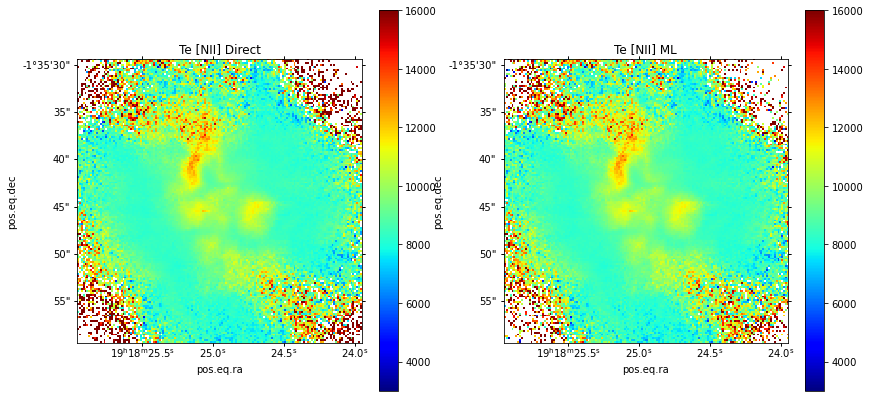

In [10]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(14, 7), subplot_kw={'projection': PL.obs.wcs})
PL.plot(ax=ax1, data=PL.TeNe['N2S2D']['Te'], vmin=3000, vmax=16000, type_='orig', title='Te [NII] Direct', cmap='jet')
PL.plot(ax=ax2, data=PL.TeNe['N2S2']['Te'], vmin=3000, vmax=16000, type_='orig', title='Te [NII] ML', cmap='jet')

In [11]:
def compare(diag, var, label, delta_range=5, use_log=False):
    f = plt.figure(figsize=(10, 10))
    ax1 = f.add_subplot(221, projection = PL.obs.wcs)
    ax2 = f.add_subplot(222, projection = PL.obs.wcs)
    ax3 = f.add_subplot(223)
    ax4 = f.add_subplot(224)
    d1 = PL.TeNe[diag+'D'][var]
    d2 = PL.TeNe[diag][var]
    if use_log:
        d1 = np.log10(d1)
        d2 = np.log10(d2)
    vmin = np.nanmin(d2)
    vmax = np.nanmax(d2)
    delta = (d1.ravel()-d2.ravel()) / d1.ravel() * 100
    PL.plot(ax=ax1, data=d1, vmin=vmin, vmax=vmax, type_='orig', title='{} direct'.format(label), cmap='jet')
    PL.plot(ax=ax2, data=(d1-d2)/d2*100, vmin=-delta_range, vmax=delta_range, type_='orig', title='{} Difference [%]'.format(label), cmap='jet')
    ax3.hist(delta, bins=np.linspace(-delta_range, delta_range, 100))
    ax3.set_xlabel('{} Difference [%]'.format(label))
    ax3.set_title('Median(Diff) {:.1f}%'.format(np.nanmedian(delta)))
    ax4.scatter(d1.ravel(), delta, alpha=0.01)
    ax4.set_title('STD(Diff) {:.1f}%'.format(np.nanstd(delta)))
    ax4.set_xlim(vmin, vmax)
    ax4.set_ylim(-delta_range, delta_range)
    ax4.set_xlabel('{}'.format(label))
    ax4.set_ylabel('{} Difference [%]'.format(label))

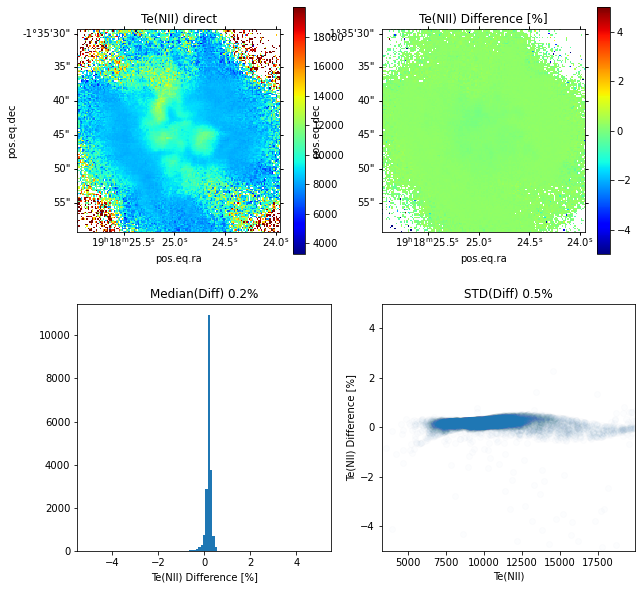

In [12]:
compare('N2S2', 'Te', label='Te(NII)', delta_range=5)

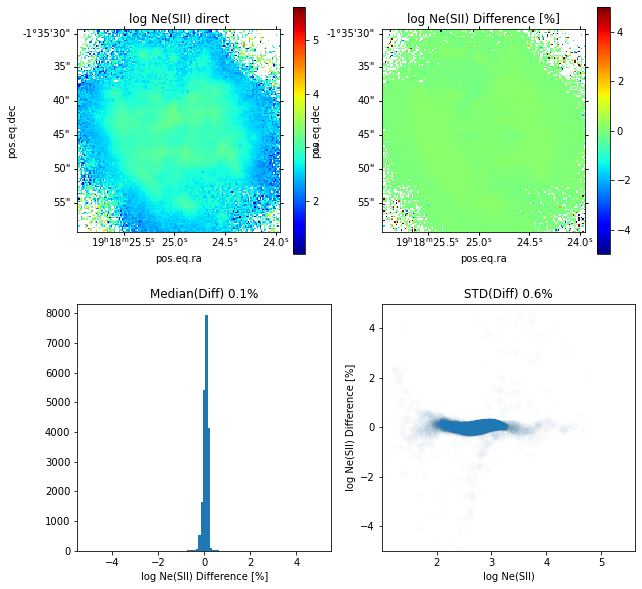

In [13]:
compare('N2S2', 'Ne', label='log Ne(SII)', use_log=True, delta_range=5)

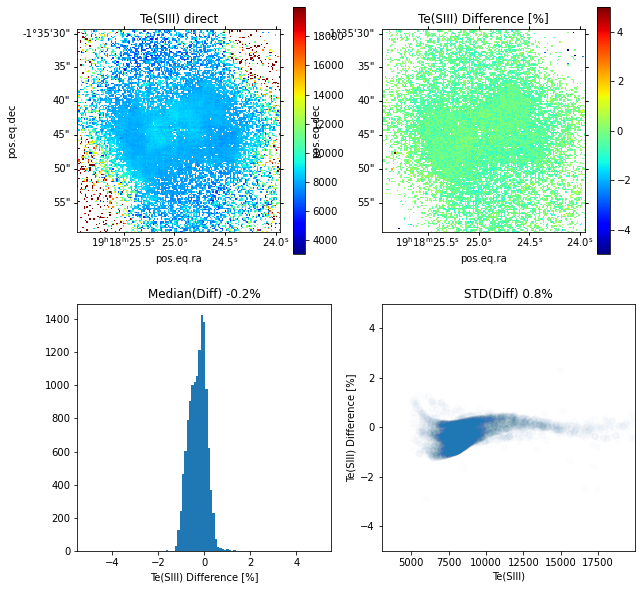

In [15]:
compare('S3Cl3', 'Te', label='Te(SIII)', delta_range=5)

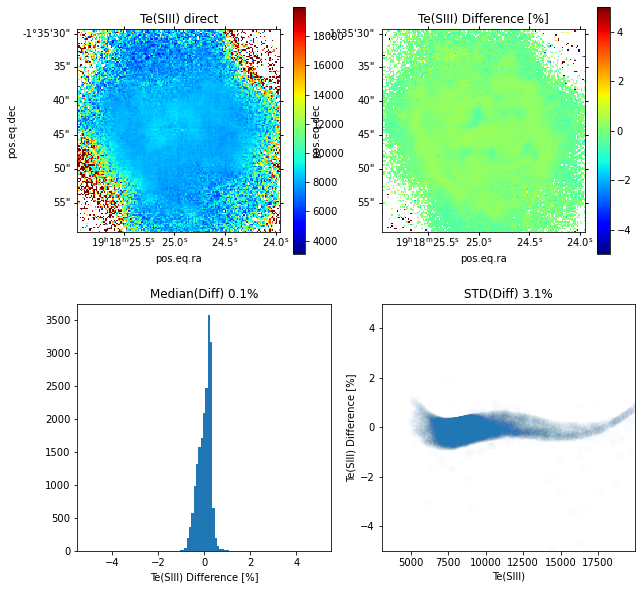

In [16]:
compare('S3S2', 'Te', label='Te(SIII)', delta_range=5)